In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Load the dataset to examine its structure
file_path = '/content/New Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows and the column names
data.head()

,Entity,Code,Year,Under 5,5-14 years,15-49 years,50-69 years,70+ years,Continent
0,Afghanistan,AFG,1990,78170,5642,22968,40624,34681,Asia
1,Afghanistan,AFG,1991,83035,6433,26523,41414,35271,Asia
2,Afghanistan,AFG,1992,93859,6854,30000,41829,35694,Asia
3,Afghanistan,AFG,1993,106537,7206,32339,42598,36433,Asia
4,Afghanistan,AFG,1994,115334,8106,36817,43923,37460,Asia


In [4]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 27.3 MB/s eta 0:00:00


In [9]:
import plotly.graph_objs as go
import pandas as pd
from dash import Dash, dcc, html
from dash.dependencies import Input, Output



# List of age groups
age_groups = [
    'Under 5',
    '5-14 years',
    '15-49 years',
    '50-69 years',
    '70+ years '
]

# List of countries including 'World' for the dropdown
countries = data['Entity'].unique().tolist()
countries.insert(0, 'World')

# List of years for the dropdown menu
years = data['Year'].unique().tolist()
years.insert(0, 'All years')

# Function to get the data for a specific country or the whole world
def get_filtered_data(country, year):
    if year == 'All years':
        filtered_data = data.groupby('Entity')[age_groups].sum().reset_index()
    else:
        filtered_data = data[data['Year'] == year]

    if country == 'World':
        filtered_data = filtered_data[age_groups].sum().reset_index()
        filtered_data.columns = ['Age Group', 'Deaths']
    else:
        filtered_data = filtered_data[filtered_data['Entity'] == country][age_groups].sum().reset_index()
        filtered_data.columns = ['Age Group', 'Deaths']

    return filtered_data

# Initialize the Dash app
app = Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': str(year), 'value': year} for year in years],
        value='All years'
    ),
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': country, 'value': country} for country in countries],
        value='World'
    ),
    dcc.Graph(id='bar-chart')
])

# Define the callback to update the chart based on the selected year and country
@app.callback(
    Output('bar-chart', 'figure'),
    [Input('year-dropdown', 'value'), Input('country-dropdown', 'value')]
)
def update_chart(selected_year, selected_country):
    filtered_data = get_filtered_data(selected_country, selected_year)

    fig = go.Figure(data=[
        go.Bar(
            x=filtered_data['Age Group'],
            y=filtered_data['Deaths'],
            text=filtered_data['Deaths'],
            textposition='auto',
            marker_color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
        )
    ])

    fig.update_layout(
        title=f'Distribution of Deaths by Age Group in {selected_country} ({selected_year})',
        xaxis_title='Age Groups',
        yaxis_title='Number of Deaths',
        xaxis_tickangle=-45
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [8]:
import plotly.graph_objs as go
import pandas as pd


# Define the year for the visualization
year = 1990

# List of countries including 'World' for the dropdown
countries = data['Entity'].unique().tolist()
countries.insert(0, 'World')

# Create the dropdown options
dropdown_options = [{'label': country, 'value': country} for country in countries]

# Function to get the data for a specific country or the whole world
def get_filtered_data(country, year):
    if country == 'World':
        filtered_data = data[data['Year'] == year].sum(numeric_only=True)
        filtered_data['Entity'] = 'World'
    else:
        filtered_data = data[(data['Entity'] == country) & (data['Year'] == year)].iloc[0]
    return filtered_data

# Create the initial figure
initial_country = 'World'
filtered_data = get_filtered_data(initial_country, year)
age_groups = [
    'Under 5',
    '5-14 years',
    '15-49 years',
    '50-69 years',
    '70+ years '
]
values = filtered_data[age_groups].values.flatten()

fig = go.Figure(data=[
    go.Bar(
        x=age_groups,
        y=values,
        text=values,
        textposition='auto',
        marker_color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
    )
])

# Update the layout
fig.update_layout(
    title=f'Distribution of Deaths by Age Group in {initial_country} ({year})',
    xaxis_title='Age Groups',
    yaxis_title='Number of Deaths',
    xaxis_tickangle=-45,
    updatemenus=[
        {
            'buttons': [
                {
                    'args': [{'y': [get_filtered_data(country, year)[age_groups].values.flatten()]}],
                    'label': country,
                    'method': 'restyle'
                } for country in countries
            ],
            'direction': 'down',
            'showactive': True,
            'x': 0.1,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        },
    ]
)

# Show the figure
fig.show()


In [10]:
import pandas as pd



# Define a dictionary to map countries to their continents
country_to_continent = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Andorra': 'Europe',
    'Angola': 'Africa',
    'Antigua and Barbuda': 'North America',
    'Argentina': 'South America',
    'Armenia': 'Asia',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'Azerbaijan': 'Asia',
    'Bahamas': 'North America',
    'Bahrain': 'Asia',
    'Bangladesh': 'Asia',
    'Barbados': 'North America',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'North America',
    'Benin': 'Africa',
    'Bhutan': 'Asia',
    'Bolivia': 'South America',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'South America',
    'Brunei': 'Asia',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Asia',
    'Cameroon': 'Africa',
    'Canada': 'North America',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Comoros': 'Africa',
    'Congo': 'Africa',
    'Costa Rica': 'North America',
    'Croatia': 'Europe',
    'Cuba': 'North America',
    'Cyprus': 'Asia',
    'Czechia': 'Europe',
    'Denmark': 'Europe',
    'Djibouti': 'Africa',
    'Dominica': 'North America',
    'Dominican Republic': 'North America',
    'Ecuador': 'South America',
    'Egypt': 'Africa',
    'El Salvador': 'North America',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Eswatini': 'Africa',
    'Ethiopia': 'Africa',
    'Fiji': 'Oceania',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Asia',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Grenada': 'North America',
    'Guatemala': 'North America',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'South America',
    'Haiti': 'North America',
    'Honduras': 'North America',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Iraq': 'Asia',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'Italy': 'Europe',
    'Jamaica': 'North America',
    'Japan': 'Asia',
    'Jordan': 'Asia',
    'Kazakhstan': 'Asia',
    'Kenya': 'Africa',
    'Kiribati': 'Oceania',
    'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia',
    'Laos': 'Asia',
    'Latvia': 'Europe',
    'Lebanon': 'Asia',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Africa',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Oceania',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'North America',
    'Micronesia': 'Oceania',
    'Moldova': 'Europe',
    'Monaco': 'Europe',
    'Mongolia': 'Asia',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'Asia',
    'Namibia': 'Africa',
    'Nauru': 'Oceania',
    'Nepal': 'Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Oceania',
    'Nicaragua': 'North America',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'North Korea': 'Asia',
    'North Macedonia': 'Europe',
    'Norway': 'Europe',
    'Oman': 'Asia',
    'Pakistan': 'Asia',
    'Palau': 'Oceania',
    'Panama': 'North America',
    'Papua New Guinea': 'Oceania',
    'Paraguay': 'South America',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Qatar': 'Asia',
    'Romania': 'Europe',
    'Russia': 'Europe',
    'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America',
    'Saint Vincent and the Grenadines': 'North America',
    'Samoa': 'Oceania',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Asia',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Asia',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Oceania',
    'Somalia': 'Africa',
    'South Africa': 'Africa',
    'South Korea': 'Asia',
    'South Sudan': 'Africa',
    'Spain': 'Europe',
    'Sri Lanka': 'Asia',
    'Sudan': 'Africa',
    'Suriname': 'South America',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syria': 'Asia',
    'Taiwan': 'Asia',
    'Tajikistan': 'Asia',
    'Tanzania': 'Africa',
    'Thailand': 'Asia',
    'Timor-Leste': 'Asia',
    'Togo': 'Africa',
    'Tonga': 'Oceania',
    'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa',
    'Turkey': 'Asia',
    'Turkmenistan': 'Asia',
    'Tuvalu': 'Oceania',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'United States': 'North America',
    'Uruguay': 'South America',
    'Uzbekistan': 'Asia',
    'Vanuatu': 'Oceania',
    'Venezuela': 'South America',
    'Vietnam': 'Asia',
    'Yemen': 'Asia',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}

# Add a 'Continent' column to the dataset
data['Continent'] = data['Entity'].map(country_to_continent)




In [11]:
data.head()
data.columns

Index(['Entity', 'Code', 'Year', 'Under 5', '5-14 years', '15-49 years',
       '50-69 years', '70+ years ', 'Continent'],
      dtype='object')

In [12]:
data.to_csv('New Data.csv', index=False)

In [13]:
import plotly.graph_objs as go



# Define the year for the visualization
year = 1990

# Filter data for the specified year
filtered_data = data[data['Year'] == year]

# Group data by continent and sum the death counts
continent_data = filtered_data.groupby('Continent')[age_groups].sum().reset_index()

# Data for the stacked bar chart
age_groups = [
    'Under 5',
    '5-14 years',
    '15-49 years',
    '50-69 years',
    '70+ years '
]

# Initialize the figure
fig = go.Figure()

# Add a bar for each age group
for age_group in age_groups:
    fig.add_trace(go.Bar(
        y=continent_data['Continent'],
        x=continent_data[age_group],
        name=age_group,
        orientation='h'
    ))

# Update the layout
fig.update_layout(
    barmode='stack',
    title=f'Death Rates by Age Group in {year} by Continent',
    xaxis_title='Number of Deaths',
    yaxis_title='Continent',
    legend_title='Age Groups',
    yaxis=dict(categoryorder='total ascending')  # This will stack the smallest bar on top
)

# Show the figure
fig.show()


In [14]:
import plotly.graph_objs as go
import plotly.express as px

# Filter data for a specific country
country = 'Afghanistan'
country_data = data[data['Entity'] == country]

# Create an empty figure
fig = go.Figure()

# Add traces for each age group
for age_group in age_groups:
    fig.add_trace(go.Scatter(
        x=country_data['Year'],
        y=country_data[age_group],
        mode='lines+markers',
        name=age_group,
        hoverinfo='text',
        text=[f'Year: {year}<br>{age_group}: {deaths}' for year, deaths in zip(country_data['Year'], country_data[age_group])]
    ))

# Update layout
fig.update_layout(
    title=f'Trends of Deaths by Age Group in {country} Over Time',
    xaxis_title='Year',
    yaxis_title='Number of Deaths',
    hovermode='x unified'
)

# Show the figure
fig.show()


In [15]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px


# List of age groups
age_groups = ['Under 5', '5-14 years', '15-49 years', '50-69 years', '70+ years ']

# Create an empty figure
fig = go.Figure()

# Function to get data for a specific country or the whole world
def get_country_data(country):
    if country == 'World':
        return data.groupby('Year')[age_groups].sum().reset_index()
    else:
        return data[data['Entity'] == country]

# Initial country
initial_country = 'World'
country_data = get_country_data(initial_country)

# Add traces for each age group
for age_group in age_groups:
    fig.add_trace(go.Scatter(
        x=country_data['Year'],
        y=country_data[age_group],
        mode='lines+markers',
        name=age_group,
        hoverinfo='text',
        text=[f'Year: {year}<br>{age_group}: {deaths}' for year, deaths in zip(country_data['Year'], country_data[age_group])]
    ))

# Update layout
fig.update_layout(
    title=f'Trends of Deaths by Age Group in {initial_country} Over Time',
    xaxis_title='Year',
    yaxis_title='Number of Deaths',
    hovermode='x unified',
    updatemenus=[
        {
            'buttons': [
                {'label': 'World', 'method': 'update', 'args': [{'y': [get_country_data('World')[age_group] for age_group in age_groups]}, {'title': 'Trends of Deaths by Age Group in World Over Time'}]},
                *[
                    {'label': country, 'method': 'update', 'args': [{'y': [get_country_data(country)[age_group] for age_group in age_groups]}, {'title': f'Trends of Deaths by Age Group in {country} Over Time'}]}
                    for country in data['Entity'].unique()
                ]
            ],
            'direction': 'down',
            'showactive': True,
        }
    ]
)

# Show the figure
fig.show()


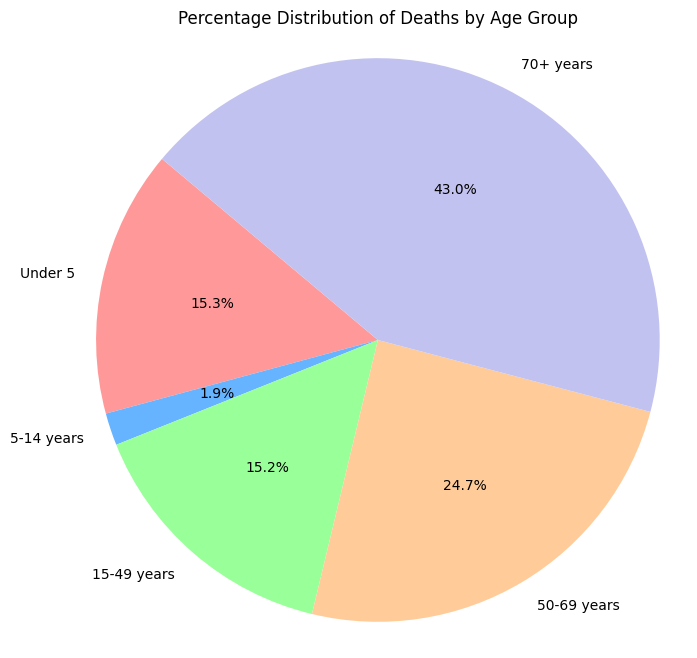

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate the total number of deaths for each age group across all years
total_deaths = data[['Under 5', '5-14 years', '15-49 years', '50-69 years', '70+ years ']].sum()

# Define the age groups and values
age_groups = ['Under 5', '5-14 years', '15-49 years', '50-69 years', '70+ years ']
values = total_deaths.values

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=age_groups, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Percentage Distribution of Deaths by Age Group')
plt.axis('equal')
plt.savefig('percentage_distribution_deaths_1990_2019.png')
plt.show()


<ipython-input-17-d68c62932076>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




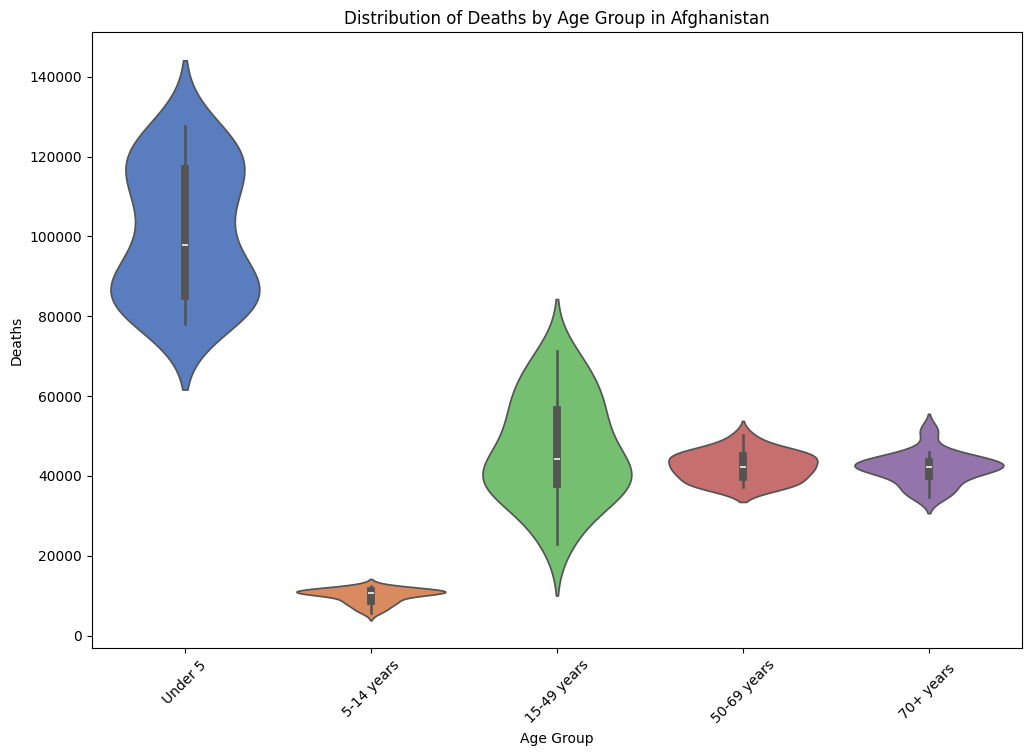

In [17]:
import seaborn as sns

# Filter data for a specific country
country = 'Afghanistan'
country_data = data[data['Entity'] == country]

# Melt the data for violin plot
melted_data = country_data.melt(id_vars=['Year'], value_vars=age_groups, var_name='Age Group', value_name='Deaths')

# Plotting the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Age Group', y='Deaths', data=melted_data, palette='muted')
plt.title(f'Distribution of Deaths by Age Group in {country}')
plt.xticks(rotation=45)
plt.show()


<ipython-input-18-f6ad99ebee8a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




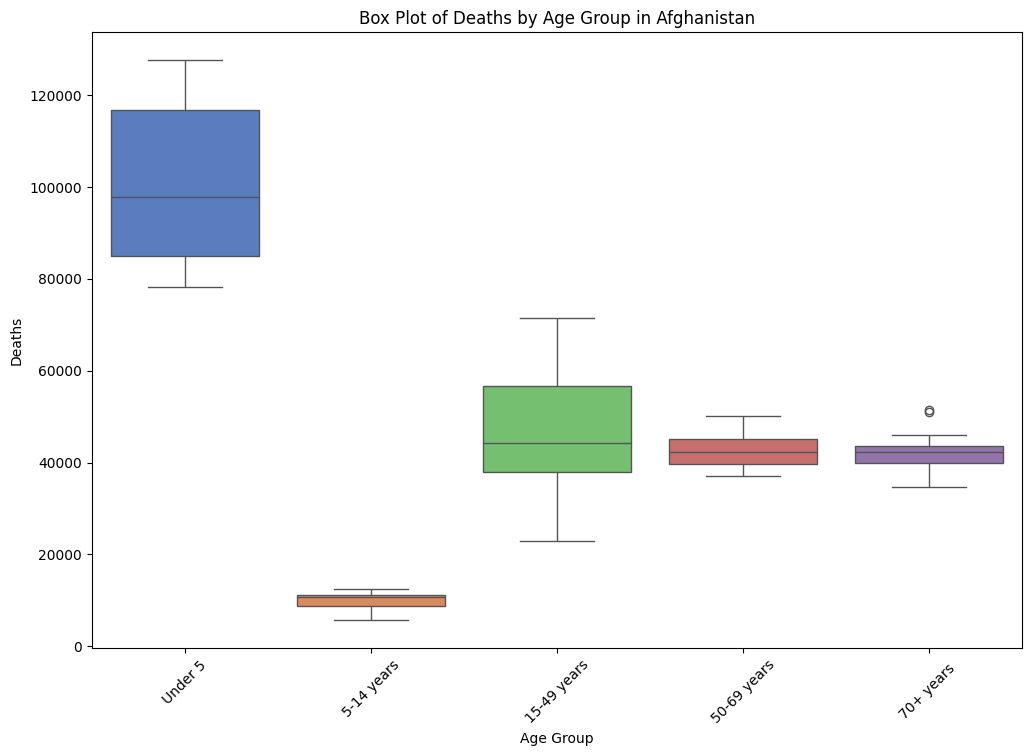

In [18]:
# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age Group', y='Deaths', data=melted_data, palette='muted')
plt.title(f'Box Plot of Deaths by Age Group in {country}')
plt.xticks(rotation=45)
plt.show()
